In [39]:
## A - Q1. Estimating Household Demand for Toilet Paper (7 Points)

In [5]:
from numpy.random import default_rng
rng = default_rng()

def demand_estimate(days, k=1, p=0.02):
    total_toilet_paper = []
    for day in range(days):
        for person in range(k):
            sick_or_healthy = rng.choice(['Sick', 'Healthy'],p=[p, 1-p])
            if sick_or_healthy == 'Sick':
                person_toilet_paper = rng.uniform(20, 40)
            else: # sick_or_healthy == 'Healthy'
                person_toilet_paper = rng.uniform(5, 10)
            total_toilet_paper.append(person_toilet_paper)
    return sum(total_toilet_paper)

In [7]:
# Test code 1

demand_estimate(7)

# Output should be: 48.609976093943594

55.68651796662879

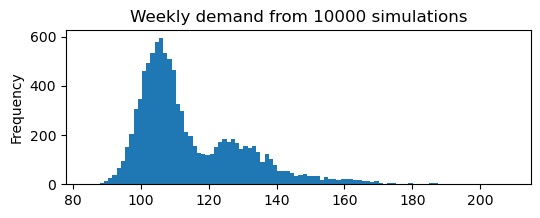

Mean: 114.75 	Std: 16.05


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

estimates=pd.Series([demand_estimate(7, 2, 0.03) for i in range(10000)])
estimates.plot(kind='hist',title='Weekly demand from 10000 simulations',bins=100,figsize=(6,2))
plt.show()
print(f'Mean: {estimates.mean():.2f} \tStd: {estimates.std():.2f}')

# Output should be: Mean: 114.81    Std: 16.08

In [37]:
## A - Q2. Simulating the Availability of Toilet Paper (8 Points)

In [13]:
demand = [20,35,60,20,10,30,50,30,20,10]
s = 100
remaining = s
sold_list = []
good_days = 0

for i in range(len(demand)):
    if i > 0 and i % 7 == 0:
        remaining += s

    if demand[i] <= remaining:
        sold = demand[i]
        good_days += 1
    else: # demand[i] > remaining
        sold = remaining

    remaining -= sold
    sold_list.append(sold)

served_proportion = sum(sold_list) / sum(demand)
good_days_proportion = good_days / len(demand)

print(f'The proportion of demand that is served: {served_proportion}')
print(f'The proportion of days in which all demand is served: {good_days_proportion}')    

The proportion of demand that is served: 0.5614035087719298
The proportion of days in which all demand is served: 0.5


In [15]:
def supply_simulation(demand, s):
    remaining = s
    sold_list = []
    good_days = 0

    for i in range(len(demand)):
        if i > 0 and i % 7 == 0:
            remaining += s

        if demand[i] <= remaining:
            sold = demand[i]
            good_days += 1
        else:
            sold = remaining

        remaining -= sold
        sold_list.append(sold)

    served_proportion = sum(sold_list) / sum(demand)
    good_days_proportion = good_days / len(demand)

    return served_proportion, good_days_proportion

In [17]:
# Test code 1
s,g=supply_simulation([20,35,60,20,10,30,50,30,20,10],100)
print('Proportion of total demand that is served: ',s)
print('Proportion of days in which all demand is served: ',g)

# Output should be: 
# Proportion of total demand that is served:  0.5614035087719298
# Proportion of days in which all demand is served:  0.5

Proportion of total demand that is served:  0.5614035087719298
Proportion of days in which all demand is served:  0.5


In [19]:
# Test code 2
demand=([10]*7)+([20]*3)
supply_simulation(demand,70)

# Output should be: (1.0, 1.0)

(1.0, 1.0)

In [21]:
# Test code 3
demand=([20]*10)
supply_simulation(demand,70)

# Output should be: (0.65, 0.6)

(0.65, 0.6)

In [35]:
## A - Q3. Distance Travelled to Buy Toilet Paper (9 Points)
## Need to work > Done

In [23]:
from numpy.random import default_rng
rng = default_rng()

import math

def travel_distance(locations, probabilities):
    home = [0, 0]
    total_distance = 0

    for i in range(len(locations)):
        location = locations[i]
        if i == 0:
            location_before = home
        else:
            location_before = locations[i - 1]
        
        # Calculate the distance to the current store
        travel_distance = math.sqrt((location[0] - location_before[0]) ** 2 + (location[1] - location_before[1]) ** 2)
        total_distance += travel_distance

        probability = probabilities[i]
        # Check if the store has toilet paper
        check_stock = rng.choice(['In-stock', 'Out-of-stock'], p=[probability, 1-probability])
        if check_stock == 'In-stock' or i == len(locations) - 1:
            # Return home if toilet paper is found
            go_back_distance = math.sqrt((location[0] - home[0]) ** 2 + (location[1] - home[1]) ** 2)
            total_distance += go_back_distance
            break
    
    return total_distance

In [27]:
# Test code 1
travel_distance([[3,4],[-3,4],[-8,6]],[0,1,1])
# Output should be: 16.0

16.0

In [29]:
# Test code 2
print(travel_distance([[3,4],[-3,4],[-8,6]],[1,1,0]))
# Output should be: 10.0

10.0


In [31]:
# Test code 3
travel_distance([[3,4],[-3,4],[-8,6]],[0,0,0])
# Output should be: 26.385164807134505

26.385164807134505

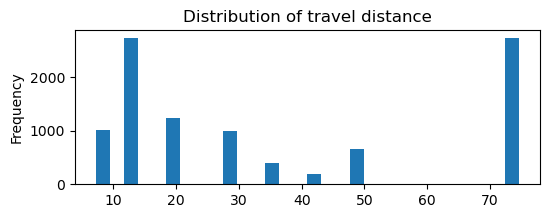

Mean: 35.33
Standard deviation: 26.28


In [33]:
# Test code 4
locations=[[3,2],[5,4],[7,-1],[5,-8],[-5,-4],[-6,2],[-8,4],[-20,10]]
probabilities=[0.1,0.3,0.2,0.2,0.1,0.05,0.2,0.05]

import pandas as pd
import matplotlib.pyplot as plt
distances=pd.Series([travel_distance(locations,probabilities) for i in range(10000)])
distances.plot(kind='hist',bins=30,title='Distribution of travel distance',figsize=(6,2))
plt.show()
print('Mean:',round(distances.mean(),2))
print('Standard deviation:',round(distances.std(),2))